# GAN torch

In [5]:
import torch
import torch.nn  as nn
import pandas
import matplotlib.pyplot as plt
import random
import numpy


In [6]:
def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8,1.0),
         random.uniform(0.0,0.2),
         random.uniform(0.8,1.0),
         random.uniform(0.0,0.2)              
        ]
    )
    return real_data
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(4,3),
            nn.Sigmoid(),
            nn.Linear(3,1),
            nn.Sigmoid()
        )
        self.loss_function = nn.MSELoss()
        
        self.optimiser = torch.optim.SGD(self.parameters(),lr=0.01)
        
        self.counter = 0;
        self.progress = []
        pass
    def forward(self,inputs):
        return self.model(inputs)
    def train(self,inputs,targets):
        outputs = self.forward(inputs)
        
        loss = self.loss_function(outputs,targets)
        
        self.counter +=1
        if(self.counter%10==0):
            self.progress.append(loss.item())
            pass
        if(self.counter%10000==0):
            print('counter=',self.counter)
            pass
        
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    def plot_progress(self):
        df = pandas.DataFrame(self.progress,columns=['loss'])
        df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.5))
        pass
    pass
        

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(1,3),
            nn.Sigmoid(),
            nn.Linear(3,4),
            nn.Sigmoid()
        )
        self.optimiser = torch.optim.SGD(self.parameters(),lr=0.01)
        self.counter = 0;
        self.progress = []
        pass
    def forward(self,inputs):
        return self.model(inputs)
    def train(self,D,inputs,targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output,targets)
        self.counter += 1
        if(self.counter%10==0):
            self.progress.append(loss.item())
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    def plot_progress(self):
        df = pandas.DataFrame(self.progress,columns=['loss'])
        df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,maeker='.',grid=True,yticks=(0,0.25,0.5))
        pass
    pass
        

counter= 10000
counter= 20000


tensor([0.6012, 0.4570, 0.3061, 0.7134], grad_fn=<SigmoidBackward0>)

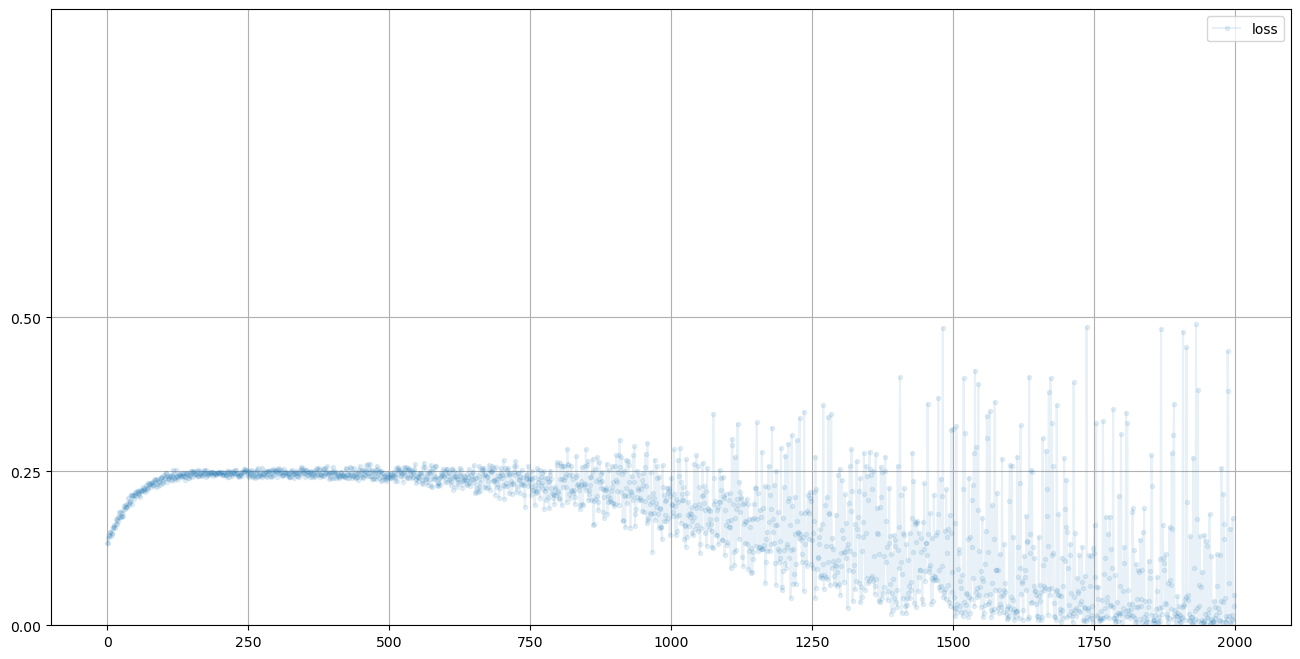

In [9]:
D = Discriminator()

for i in range(10000):
    D.train(generate_real(),torch.FloatTensor([1.0]))
    D.train(generate_random(4),torch.FloatTensor([0.0]))
    pass
D.plot_progress()
G = Generator()
G.forward(torch.FloatTensor([0.5]))

counter= 10000
counter= 20000


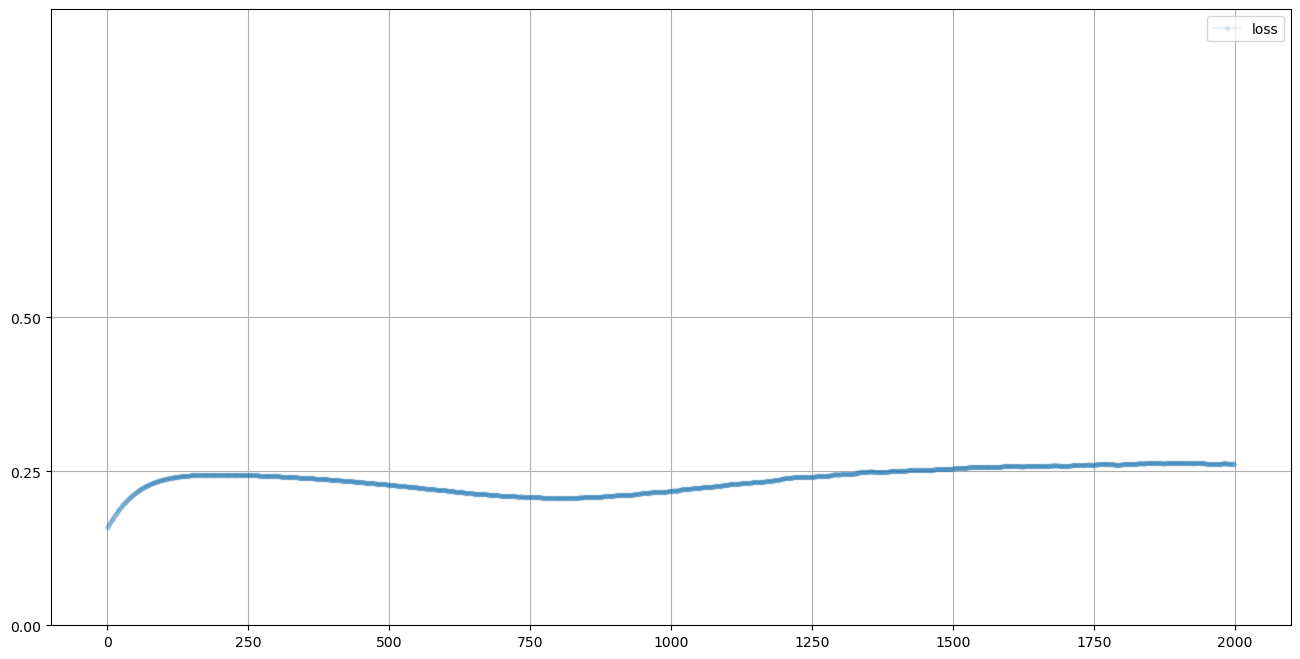

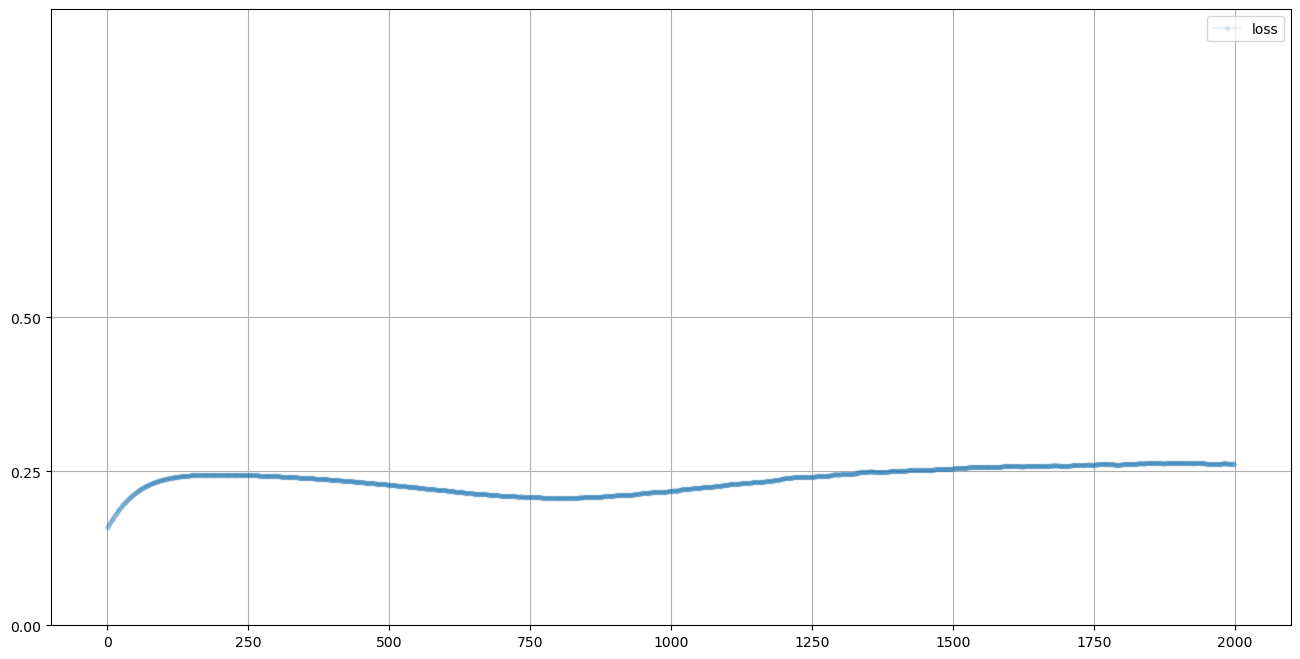

In [10]:
D = Discriminator()
G = Generator()
image_list = []
for i in range(10000):
    D.train(generate_real(),torch.FloatTensor([1.0]))
    
    D.train(G.forward(torch.FloatTensor([0.5])).detach(),torch.FloatTensor([0.0]))
    
    G.train(D,torch.FloatTensor([0.5]),torch.FloatTensor([1.0]))
    
    if(i%100==0):
        image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())
    pass
D.plot_progress()
D.plot_progress()